# Part I - (Prosper Loan Data Exploration)
## by (Joy Ikogho)

## Introduction
This data set contains 113,937 loan lists from 2005Q4 till 2014Q1 with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
I am interested in finding the relationship between many variables for example
* What affects the borrower’s APR or interest rate?
* The effect of the employment status and occupation and monthly salary to the loan amount?
* What factors affect a loan’s outcome status?

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load dataset and view statistics
loan = pd.read_csv("https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv")
print(loan.shape)
print(loan.info())
# loan.head()
# loan.describe()

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRa

### Let's assess and do some cleanup to the data

Let's check for duplicates in the dataset

In [3]:
loan.duplicated().any()

False

In [4]:
# check for with missing value
loan.Occupation.isna().any()

True

fill in missing values of occupation

In [5]:
# filling missing values for the Occupation as other
loan.Occupation = loan.Occupation.fillna('Other')


In [6]:
# check for rows with missing value
loan.BorrowerAPR.isna().sum()

25

In [7]:
# remove loans with missing borrower APR information
loan = loan[~loan.BorrowerAPR.isna()]

In [8]:
loan.info()
print(loan.shape)
loan.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113912 non-null object
ListingNumber                          113912 non-null int64
ListingCreationDate                    113912 non-null object
CreditGrade                            28928 non-null object
Term                                   113912 non-null int64
LoanStatus                             113912 non-null object
ClosedDate                             55064 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113912 non-null float64
LenderYield                            113912 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139120e+05,113912.000000,113912.000000,113912.000000,113912.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000
mean,6.280235e+05,40.831308,0.218828,0.192786,0.182723,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.734997,-14.244741,700.600068,681.570049,25.148204,0.998583,0.048037,0.023465,16.554383,80.491792
std,3.279803e+05,10.437112,0.080364,0.074809,0.074506,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.677981,109.244070,2388.753377,2357.404098,275.687933,0.017921,0.332389,0.232437,294.577640,103.244281
min,7.000000e+01,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.012110e+05,36.000000,0.156290,0.134000,0.124500,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.006245e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.450000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.927982e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.930000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


Let's Convert CreditGrade, loan status and Employment status into ordered categorical types, And also do some cleaning to BorrowerAPR

In [9]:
# Convert CreditGrade into ordered categorical type
grad_order=["AA","A","B","C","D","E","HR","NC"]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = grad_order)
loan['CreditGrade'] = loan['CreditGrade'].astype(ordered_var)

# Convert loan status into ordered categorical type
status_order = ['Cancelled','Chargedoff','Completed','Current','Defaulted','FinalPaymentInProgress','Past Due (1-15 days)',
                'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)',
                'Past Due (>120 days)']

ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = status_order)
loan['LoanStatus'] = loan['LoanStatus'].astype(ordered_var)

# Convert Employment status into ordered categorical type
emp_order = ['Employed','Full-time','Not available','Not employed','Other','Part-time','Retired','Self-employed']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan['EmploymentStatus'] = loan['EmploymentStatus'].astype(ordered_var)

### What is the structure of your dataset?

The structure of the dataset is 113,912 rows, 81 columns containing data about the loans from quarter four in 2005 to quarter one in 2014

### What is/are the main feature(s) of interest in your dataset?
I am intersted in finding
* What affects the borrower’s Rate or interest rate?
* The effect of the employment status and occupation and monthly salary to the loan amount?
* What factors affect a loan’s outcome status?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will be exploring alot of the features in order to get a better understanding of the data, and also try to find the best answers to the questions.

> CreditGrade, Term, LoanStatus, BorrowerRate, BorrowerAPR, ProsperScore, ListingCategory, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, Investors, MonthlyLoanPayment, IncomeRange, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, And any other variable if needed.

## Univariate Exploration
I will start by looking at the main variable of interest: BorrowerAPR.

Let's start by creating functions in order to avoid repetition of code. 

In [10]:
#function to plot the virtical bar
def plot_vertical_bar(dataframe, column_name):
    my_color = sb.color_palette()[0]
    column_counts = dataframe[column_name].value_counts()
    plot = sb.countplot(data=dataframe, x=column_name, color=my_color, order=column_counts.index);
    return(plot)

In [11]:
#Function to plot a horizontal bar
def plot_horizontal_bar(dataframe,column_name):
    my_color = sb.color_palette()[0]
    column_counts = dataframe[column_name].value_counts()
    plot = sb.countplot(data=dataframe, y=column_name, color=my_color, order=column_counts.index)
    return(plot)

### BorrowerAPR

>What is the borrowerAPR for people who has a loan?

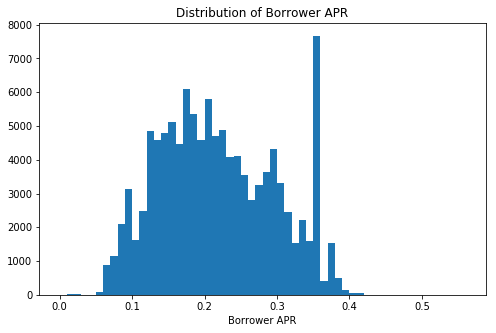

In [12]:
bins = np.arange(0, loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.title('Distribution of Borrower APR');

* The distribution of APR looks multimodal. A small peak is centered at 0.1, a large peak is centered at 0.2. There is also a small peak centered at 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

### BorrowerRate

What is the borrower's interest Rate for people who has a loan?

In [13]:
# Check for percentages
(loan["BorrowerRate"].value_counts().nlargest(5)/loan.shape[0])*100

0.3177    3.223541
0.3500    1.672344
0.3199    1.449364
0.2900    1.323829
0.2699    1.157911
Name: BorrowerRate, dtype: float64

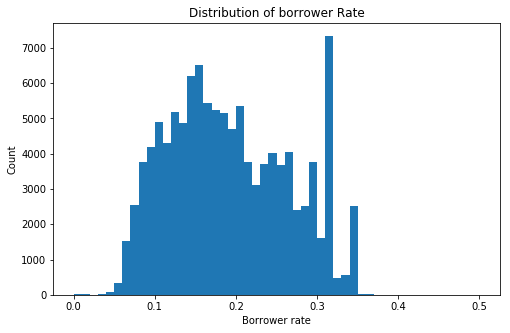

In [14]:
# Visualizing with histogram
plt.figure(figsize=[8, 5])
bins = np.arange(0,loan['BorrowerRate'].max()+0.01,0.01) 
plt.hist(x='BorrowerRate',data=loan,bins=bins)
plt.title('Distribution of borrower Rate')
plt.xlabel('Borrower rate')
plt.ylabel('Count');

* There is a peak around 0.15 with a count of over 6000 and there is another peak at 0.31 with a count of over 7000, which is the highest peak.This means, about 3.3% of borrowers pays a higher interest rate.

### LoanStatus

What is the current status of loan for people who has a loan from Prosper?

In [15]:
# Check for percentages
(loan["LoanStatus"].value_counts()/loan.shape[0])*100

Current                   49.666409
Completed                 33.402100
Chargedoff                10.527425
Defaulted                  4.405155
Past Due (1-15 days)       0.707564
Past Due (31-60 days)      0.318667
Past Due (61-90 days)      0.274774
Past Due (91-120 days)     0.266873
Past Due (16-30 days)      0.232636
FinalPaymentInProgress     0.179963
Past Due (>120 days)       0.014046
Cancelled                  0.004389
Name: LoanStatus, dtype: float64

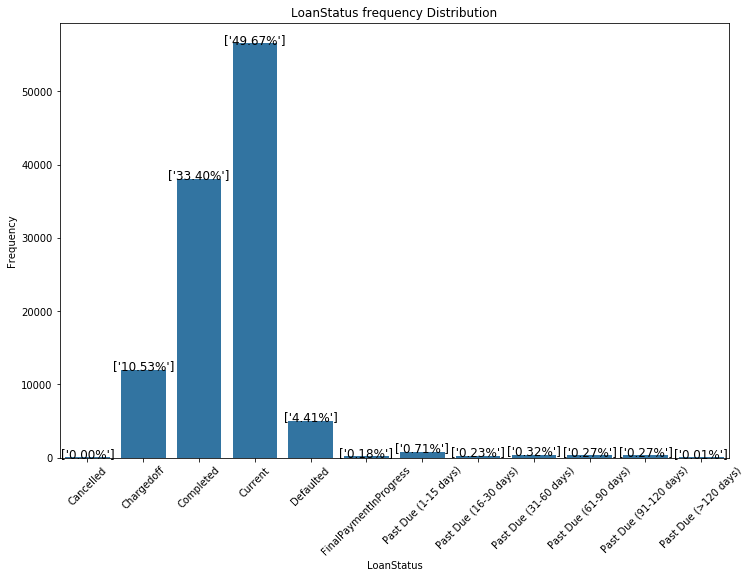

In [16]:
# Bar chart for categorical univariate exploration
plt.figure(figsize=[12, 8]);
# loan["LoanStatus"] = loan["LoanStatus"].astype(str)

base_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'LoanStatus', color = base_color);
plt.title('LoanStatus frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('LoanStatus');
plt.xticks(rotation=45);

# ploting the percentage above each bar
column_count=loan["LoanStatus"].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.2f}%".format(100*count/loan.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=12)

* The plot shows that the highest loanstatus is current, which means 49% of people currently has a loan with Prosper, followed by 33%  of people who has completed their loan. 

* The number of cancelled is the lowest with 0.0%.

### CreditGrade

The Credit rating that was assigned at the time the listing went live.

What was the most credit rating at the time of listing?

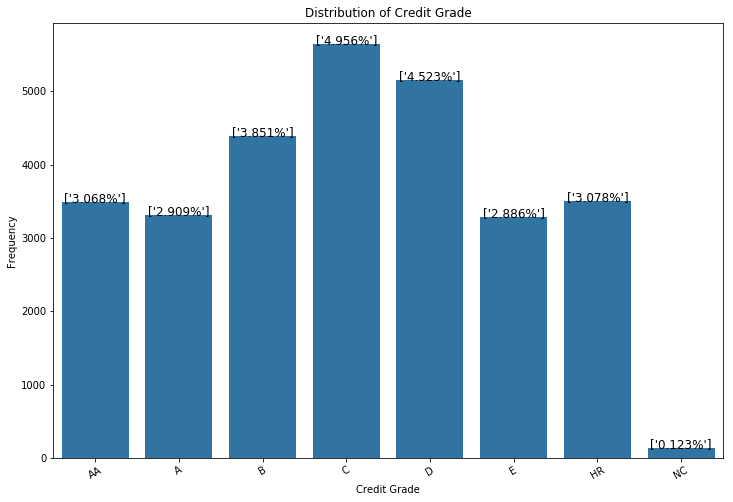

In [17]:
plt.figure(figsize=[12,8])
color=sb.color_palette()[0]

sb.countplot(data=loan,x="CreditGrade",color=color)

#labels and title
plt.xticks(rotation=30);
plt.xlabel("Credit Grade")
plt.ylabel("Frequency")
plt.title("Distribution of Credit Grade")

# ploting the percentage above each bar
column_count=loan["CreditGrade"].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.3f}%".format(100*count/loan.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=12)

* The distribution of credit ratings shows that 'C' having approximately 5.0% is the highest credit rating, and 'NC' is the lowest credit rating, having 0.1%. 

### Term

What is the duration of months people prefare to take a loan?

In [18]:
# Counting the percentages of Term
(loan["Term"].value_counts()/loan.shape[0])*100

36    77.035782
60    21.547335
12     1.416883
Name: Term, dtype: float64

* We can note from this percentage that borrowers of about 77% prefare to take a loan for 36 months

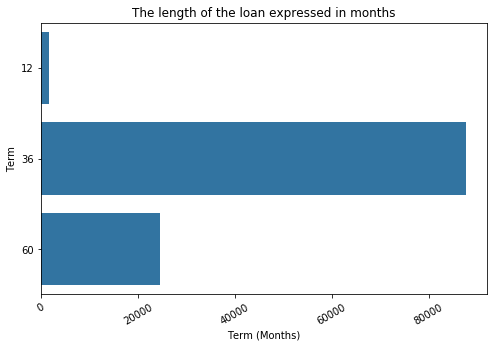

In [19]:
# Ploting the bar chart
plt.figure(figsize=[8,5])
color=sb.color_palette()[0]

# making order list
loan["Term"] = loan["Term"].astype(str)
order=["12","36","60"]
sb.countplot(data=loan,y="Term",color=color,order=order)

#labels and title
plt.xticks(rotation=30);
plt.xlabel("Term (Months)")
plt.title('The length of the loan expressed in months');

* We can also note from this graph that 36 months is the highest term, while 12 months is the lowest term. 

### EmploymentStatus

How many people do have a job?

In [20]:
# Counting values
loan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

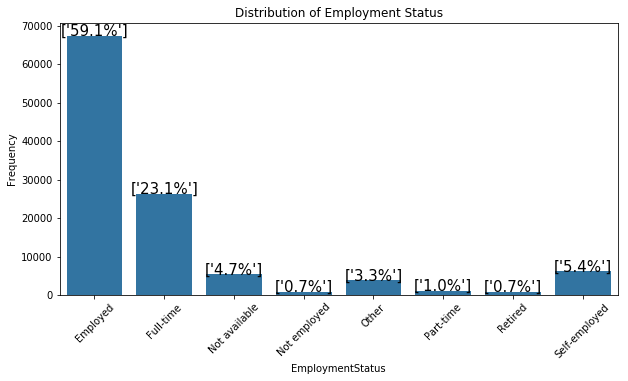

In [21]:
# Ploting the bar chart
plt.figure(figsize=[10,5])
sb.countplot(data=loan,x="EmploymentStatus", color=color);
plt.xlabel("EmploymentStatus")
plt.ylabel("Frequency")
plt.title("Distribution of Employment Status")

# ploting the percentage above each bar
column_count=loan["EmploymentStatus"].value_counts()
locs,labels=plt.xticks(rotation = 45)
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/loan.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=15)

* From this graph we can note that Employed means full_time, So it means that around 82% have a full time job. While people with part-time Employment status are the lowest with just 0.1%.
* This also means that the rate of people employed is very much higher compared to unemployed status in prosper loan.

### IncomeRange

In [22]:
# Counting the percentages of Income range
(loan["IncomeRange"].value_counts()/loan.shape[0])*100

$25,000-49,999    28.260412
$50,000-74,999    27.257883
$100,000+         15.219643
$75,000-99,999    14.850060
Not displayed      6.773650
$1-24,999          6.385631
Not employed       0.707564
$0                 0.545158
Name: IncomeRange, dtype: float64

* Here 28% of the people have income ranges between 25,000-49,999 and 27% have income ranges between 50,000-74,999.

In [23]:
# View the value counts
loan["IncomeRange"].value_counts().nlargest(5)

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7716
Name: IncomeRange, dtype: int64

What is the most common income range? 

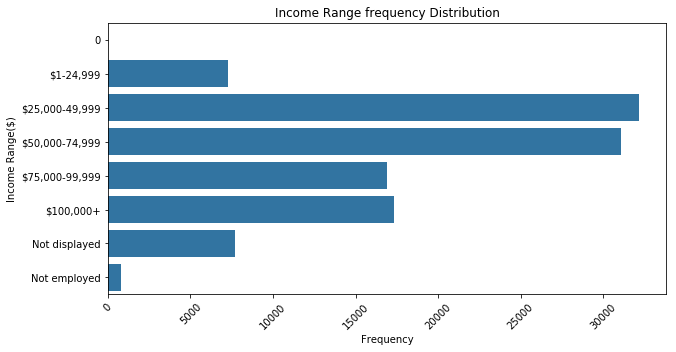

In [24]:
#Bar chart for categorical univariate exploration
plt.figure(figsize=[10, 5]);
color=sb.color_palette()[0]

#making the order list 
orders=["0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+","Not displayed","Not employed"]
sb.countplot(data = loan, y = 'IncomeRange', color = color, order = orders);

#labels and title
plt.title('Income Range frequency Distribution');
plt.ylabel('Income Range($)');
plt.xlabel('Frequency');
plt.xticks(rotation=45);


* It's shows here also that the income ranges between 25,000-49,999 is the highest and Not employed is the lowest.

### Occupation

 Here let's create a new dataframe to contain the most frequent occupations

In [25]:
# making new dataframe to contain the most frequent occupations to avoid crawding
com_occupation=loan["Occupation"].value_counts()

#select the positions repeted more than 450 times
ind=np.sum(com_occupation>450)
print(ind)
occupation_freq=com_occupation.index[:ind]
new_loan=loan[loan["Occupation"].isin(occupation_freq)]

35


In [26]:
new_loan.Occupation.count()

107919

What is the most common occupation taking a loan in the new dataframe? 

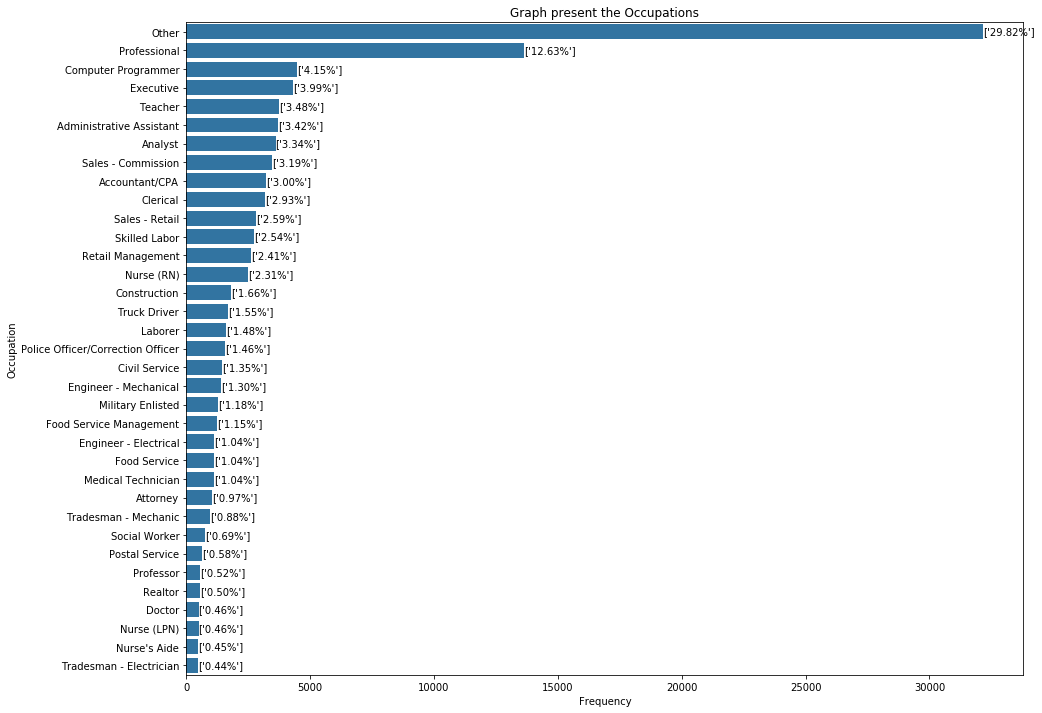

In [27]:
#ploting the bar chart
plt.figure(figsize=[15,12])

plot_horizontal_bar(new_loan,"Occupation")

#labels and title
plt.xlabel("Frequency")
plt.ylabel("Occupation")
plt.title("Graph present the Occupations");

#add % at the end of each bar
occupation_count=new_loan["Occupation"].value_counts()

for i in range(occupation_count.shape[0]):
    count=occupation_count[i]
    pct_string=["{:0.2f}%".format(100*count/new_loan.shape[0])]
    plt.text(count+1,i,pct_string,va="center")


* Ignoring Others, Professional and Computer Programmers are the most common occupations.
* Now that we have the top 35  occupations, let's create an ordinal listing. 

In [28]:
# Making the order
order_occup = ['Accountant/CPA','Administrative Assistant','Analyst','Attorney','Civil Service','Clerical','Computer Programmer','Construction','Doctor','Engineer - Electrical',
               'Engineer - Mechanical','Executive','Food Service','Food Service Management','Laborer','Medical Technician','Military Enlisted','Nurse\'s Aide','Nurse (LPN)','Nurse (RN)',
               'Other','Police Officer/Correction Officer','Postal Service','Professional','Professor','Realtor','Sales - Commission','Sales - Retail','Skilled Labor','Social Worker',
               'Teacher','Tradesman - Electrician','Tradesman - Mechanic','Truck Driver']

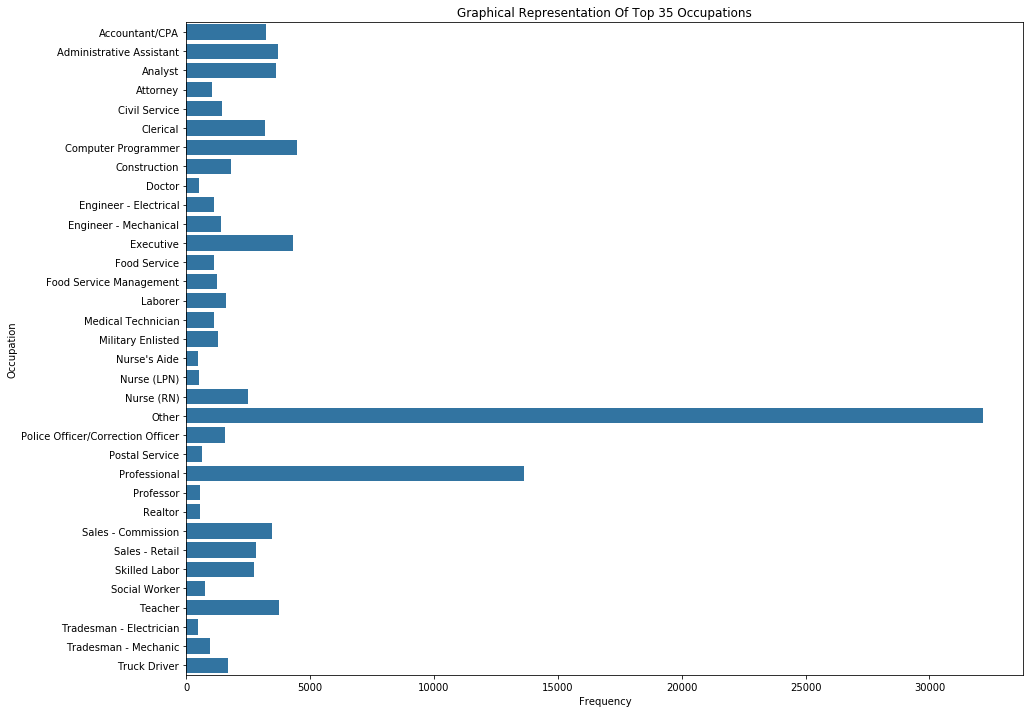

In [29]:
#ploting the count plot
plt.figure(figsize=[15,12])
sb.countplot(data = new_loan, y = 'Occupation', color = color, order = order_occup);

#labels and title
plt.xlabel("Frequency")
plt.ylabel("Occupation")
plt.title("Graphical Representation Of Top 35 Occupations");

* There are 68 different occupations selected in the dataset by the loan takers. Most popular categories by a large margin are “Other” and “Professional” which are not terribly useful for our analysis since they are too generic. Computer Programmer is the third most common selection as can be seen from the graph, Executive came in the fourth place and Teacher in the fifth. 86.2% of answers about Occupation fall in the top 1/3 of answers. The barplot of top 1/3 of anwers is depicted in the graph above.
* Let's ignore the Other and Professional

* We will make a new dataframe to contain the top 10 most common occupations to avoid crawding

In [30]:
# split occupation counts to a top 10
totals = new_loan['Occupation'].value_counts()
total_top_10 = totals[2:12]

In [31]:
# Confirm
total_top_10

Computer Programmer         4478
Executive                   4311
Teacher                     3759
Administrative Assistant    3688
Analyst                     3602
Sales - Commission          3446
Accountant/CPA              3233
Clerical                    3164
Sales - Retail              2797
Skilled Labor               2746
Name: Occupation, dtype: int64

Text(0.5,1,'Top 10 Occupation')

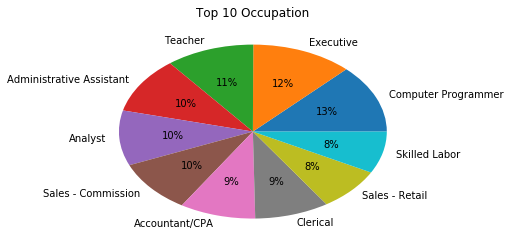

In [32]:
# plot total_top_10 by pie
plt.pie(total_top_10, labels = total_top_10.index, autopct='%1.0f%%')
plt.title('Top 10 Occupation')

* Computer Programmers seems to be the highest occupation with 13% in prosper loan, followed by Executive with 12% in the prosper loan.While Skilled Labor and Sales-Retail are the lwest occupations. 

### StatedMonthlyIncome

what is the most common income per month?

In [33]:
# Checking the percentages
(loan["StatedMonthlyIncome"].value_counts().nlargest(10)/loan.shape[0])*100

4166.666667    3.091860
5000.000000    2.975104
3333.333333    2.559871
3750.000000    2.131470
5416.666667    2.084065
5833.333333    2.035782
6250.000000    1.998034
2500.000000    1.980476
4583.333333    1.940972
6666.666667    1.896201
Name: StatedMonthlyIncome, dtype: float64

* People with StatedMonthlyIncome of 4166 are the highest, while people with StatedMonthlyIncome of $6666 are the lowest in prosper loan.

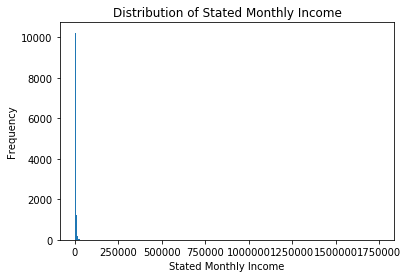

In [34]:
# plotting histogram
bins=np.arange(0, loan["StatedMonthlyIncome"].max()+500,500)
plt.hist(data=loan, x="StatedMonthlyIncome", bins=bins);

#labels and title
plt.xlabel("Stated Monthly Income")
plt.ylabel("Frequency")
plt.title("Distribution of Stated Monthly Income");

We can't see anything so we will try to make a limit for the x axis

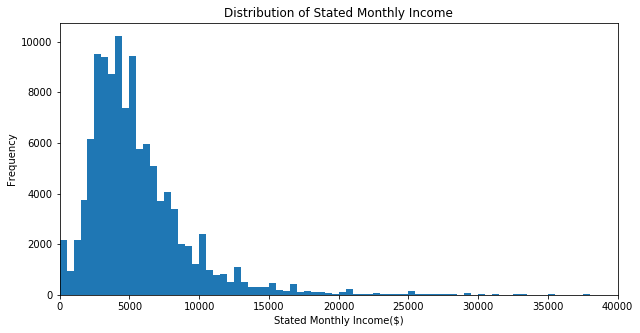

In [35]:
# making limit in x axis 
plt.figure(figsize=[10,5])
bins=np.arange(0, loan["StatedMonthlyIncome"].max()+500,500)
plt.hist(data=loan, x="StatedMonthlyIncome", bins=bins);
plt.xlim(0,40000);

#labels and title
plt.xlabel("Stated Monthly Income($)")
plt.ylabel("Frequency")
plt.title("Distribution of Stated Monthly Income");


* The distribution of stated monthly income is severely right skewed, with stated monthly income less than 30k. and peak around 3K and 5K.
* The most common monthly income is 4166 having 3.1%, followed by 5000 having a percentage of 2.9 .
* Now let's keep only monthly income of 30000 below

In [36]:
# keep monthly income <35000
loan = loan[loan.StatedMonthlyIncome<35000]

### IsBorrowerHomeowner

Is there a big difference between people who own a home or not?

In [37]:
# Counting the percentages
(loan["IsBorrowerHomeowner"].value_counts()/loan.shape[0])*100

True     50.411173
False    49.588827
Name: IsBorrowerHomeowner, dtype: float64

Text(0.5,1,'Presentation of IsBorrowerHomeowner')

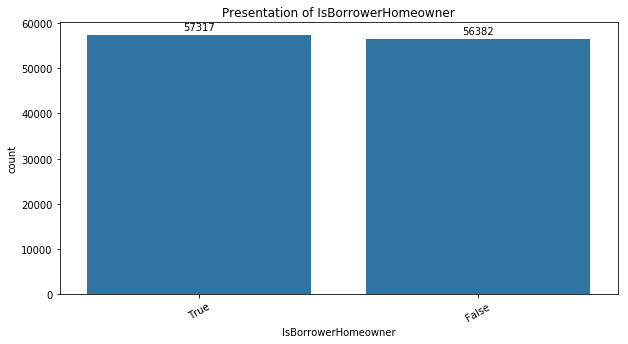

In [38]:
# ploting bar chart
plt.figure(figsize=[10,5])
plot_vertical_bar(loan,"IsBorrowerHomeowner");
plt.xticks(rotation=30);

# Adding counts of each bar on top of each bar.
for i in range (loan['IsBorrowerHomeowner'].value_counts().shape[0]):
    count = loan['IsBorrowerHomeowner'].value_counts().values[i]
    plt.text(i, count+3000, count, ha = 'center', va='top')
plt.title("Presentation of IsBorrowerHomeowner")


*  Approximately half of the people own a home(i.e 50%), and half of the people do not own a home(i.e 50%)

* So having a home or not, is not a factor that influences being given a prosper loan. 

### Prosper Score

A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

What is the distribution of Prosper score for people who has a loan?

In [39]:
# Find the percentages
(loan["ProsperScore"].value_counts()/loan.shape[0])*100

4.0     11.053747
6.0     10.791652
8.0     10.574411
7.0      9.301753
5.0      8.620129
3.0      6.711581
9.0      6.059860
2.0      5.065128
10.0     4.160986
11.0     1.275297
1.0      0.872479
Name: ProsperScore, dtype: float64

* From the percentages, prosper score ranging from 5-9 have a higher %, While ranging from 4 below have a lower %. Despite the fact that the score 4 has the highest percent.

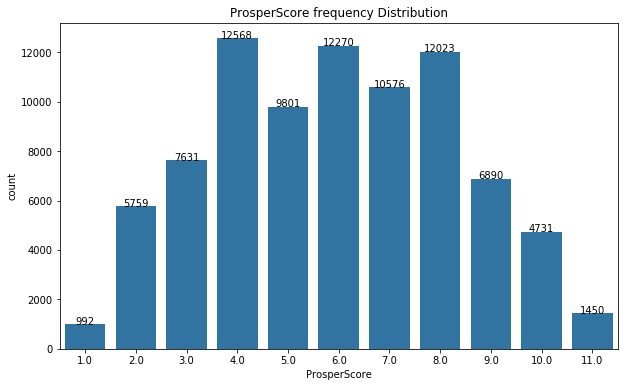

In [40]:
# Choosing color
colorchoice = sb.color_palette()[0]

# Ploting the bar chart
plt.figure(figsize=[10, 6]);
sb.countplot(data = loan, x = 'ProsperScore', color = colorchoice);
plt.title('ProsperScore frequency Distribution');

# Adding counts of bars on top of each bar.
locs, labels = plt.xticks()
cat_counts = loan['ProsperScore'].value_counts()

for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')


* Most people has score ranging from 4.0, 6.0 and 8.0. But 4.0 has the highest frequency.

### Total Prosper Loans

Are borrowers more interested in taking huge amount of loans?

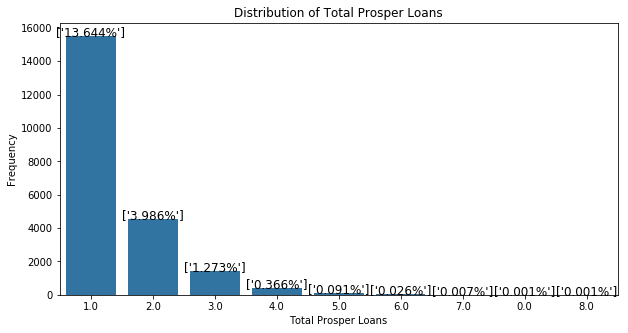

In [41]:
# Ploting the bar chart
plt.figure(figsize=[10,5])
plot_vertical_bar(loan,"TotalProsperLoans");
plt.xlabel("Total Prosper Loans")
plt.ylabel("Frequency")
plt.title("Distribution of Total Prosper Loans")

# ploting the percentage above each bar
# Convert Total Prosper Loans column type to float 
column_count=loan["TotalProsperLoans"].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=column_count[float(label.get_text())]
    pct_string=["{:0.3f}%".format(100*count/loan.shape[0])]
    plt.text(loc,count,pct_string,ha="center",fontsize=12)

* 1.0 Total loan is the highest while 8.0 is the lowest.
* This means, around 13.7% of the people majorly, have a number of 1.0 past loans

### Listing Category

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

What is the reason people borrow money?

In [42]:
# Find the percentages
(loan["ListingCategory (numeric)"].value_counts()/loan.shape[0])*100

1     51.205376
0     14.870843
7      9.212042
2      6.513690
3      6.299967
6      2.261234
4      2.103800
13     1.754633
15     1.335984
18     0.773094
14     0.770455
19     0.674588
20     0.673709
5      0.664913
16     0.267373
11     0.190855
8      0.175024
10     0.080036
9      0.074759
12     0.051891
17     0.045735
Name: ListingCategory (numeric), dtype: float64

* 51% of people take loan for Dept Consolidation, while 14% of people take loan for Not Available.
* Let's create a list and remap listing category with values from the listlet's.
* And let's also order ListingCategory (numeric) into a categorical type

In [43]:
# making the list
re_order={6:"Auto",8:"Baby&Adoption",9:"Boat", 3 :"Business", 10:"Cosmetic Procedure",
             1: "Debt Consolidation", 11:"Engagement Ring", 12:"Green Loans", 2:"Home Improvement",
             13 :"Household Expenses", 14:"Large Purchases", 15:"Medical/Dental", 16:"Motorcycle",
             0:"Not Available", 7:"Other", 4:"Personal Loan",
             17:"RV", 5:"Student Use", 18:"Taxes", 19:"Vacation", 20:"Wedding Loans"}

In [44]:
# Remaping the keys with values from the list
loan["ListingCategory (numeric)"] = loan["ListingCategory (numeric)"].map(re_order) 

In [45]:
# ListingCategory (numeric) into ordered categorical types
rate_order = ["Auto","Baby&Adoption","Boat","Business","Cosmetic Procedure",
              "Debt Consolidation","Engagement Ring","Green Loans","Home Improvement",
              "Household Expenses","Large Purchases","Medical/Dental","Motorcycle",
              "Not Available","Other","Personal Loan",
              "RV","Student Use","Taxes","Vacation","Wedding Loans"]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan['ListingCategory (numeric)'] = loan['ListingCategory (numeric)'].astype(ordered_var)

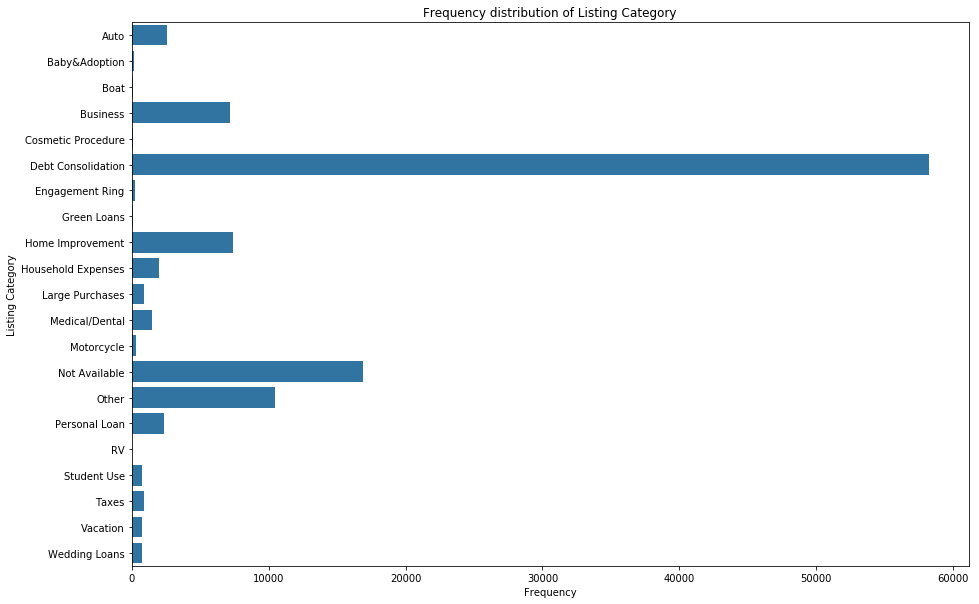

In [46]:
#ploting the bar chart
plt.figure(figsize=[15,10])
sb.countplot(data=loan, y="ListingCategory (numeric)", color = color)

#labels and title
plt.xlabel("Frequency")
plt.ylabel("Listing Category")
plt.title("Frequency distribution of Listing Category");

* From the graph, it is clear that the highest reason people borrow money is for Debt Consolidation.While lowest reason for taking a loan with prosper is RV.

### Loan Original Amount

What is the least and highest Original Amount of loan by borrowers?

In [47]:
# checking statistics
loan["LoanOriginalAmount"].describe()

count    113699.000000
mean       8325.838486
std        6233.432543
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

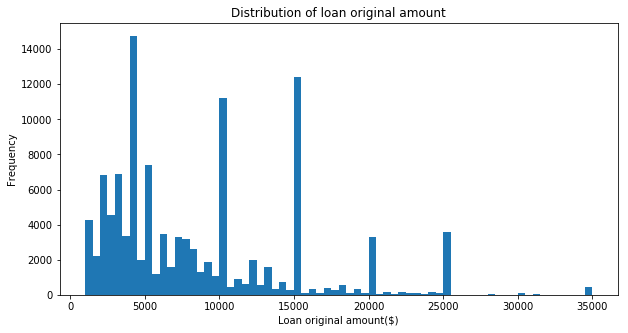

In [48]:
# Plotting histogram.
plt.figure(figsize=[10,5])
bins = np.arange(1000,loan['LoanOriginalAmount'].max()+40,500)
plt.hist(x='LoanOriginalAmount',data=loan,bins=bins)
plt.title('Distribution of loan original amount')
plt.xlabel('Loan original amount($)');
plt.ylabel('Frequency');

* From descriptive statistics we can see that minimum loan original amount is 1000 and maximum loan original amount is 35000.

* Loan original amount taken by the maximum number of borrowers ranges from 4000 to 15000.

### Monthly Loan Payment

What is the common monthly loan payment by borrowers?

In [49]:
# checking statistics
loan["MonthlyLoanPayment"].describe()

count    113699.000000
mean        272.091391
std         192.216766
min           0.000000
25%         131.500000
50%         217.740000
75%         370.620000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

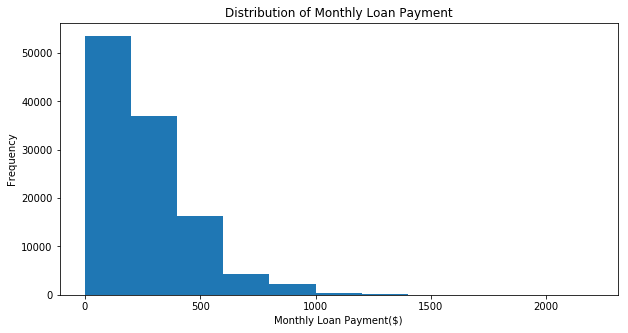

In [50]:
# Plotting histogram.
plt.figure(figsize=[10,5])
bins = np.arange(0,loan['MonthlyLoanPayment'].max()+40,200)
plt.hist(x='MonthlyLoanPayment',data=loan,bins=bins)
plt.title('Distribution of Monthly Loan Payment')
plt.xlabel('Monthly Loan Payment($)');
plt.ylabel('Frequency');

* The data is rightly skewed, we can see that minimum Monthly Loan Payment is 0 and maximum Monthly Loan Payment is 2251.

* Monthly Loan Payment by the maximum number of borrowers ranges from 10 to 500. 

### Investors

 What is the frequency of investors?

In [51]:
# checking statistics
loan["Investors"].describe()

count    113699.000000
mean         80.387708
std         103.078376
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

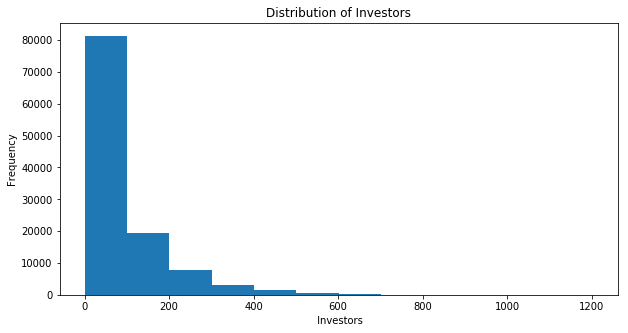

In [52]:
# Plotting histogram.
plt.figure(figsize=[10,5])
bins = np.arange(1,loan['Investors'].max()+40,100)
plt.hist(x='Investors',data=loan,bins=bins)
plt.title('Distribution of Investors')
plt.xlabel(' Investors');
plt.ylabel('Frequency');

* Most of the Investors are less than 400, but there is a peak between 0 and 100 with a frequency of 80,000.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* I performed some transformation on StatedMonthlyIncome by setting axis limit using axis lim() function. Data was not displaying anything before transformation but after doing transformation, I observed that the graph is right skewed and i noticed a peak around 2K to 5K approximately.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I did some transformation on Occupation variable and borrower rate variable.
These transformations include:
* Setting axis limit using axis lim() function
* Changing bins size to reduce noise in the graph and view data more precisely.
* Making a new dataframe column to contain the most common occupations to avoid crawding


## Bivariate Exploration

In this section, we will investigate relationships between pairs of variables in our data.

First let's make a list of the numerical and categorical variables for this section.

In [53]:
# Making a list of all numerical variables.
numeric_vars = ['BorrowerAPR','BorrowerRate','LoanOriginalAmount','MonthlyLoanPayment','ProsperScore','StatedMonthlyIncome']
cat_vars = ['CreditGrade','EmploymentStatus','Term']

### The correlation  between numeric variables present in our dataset using heatmap. 

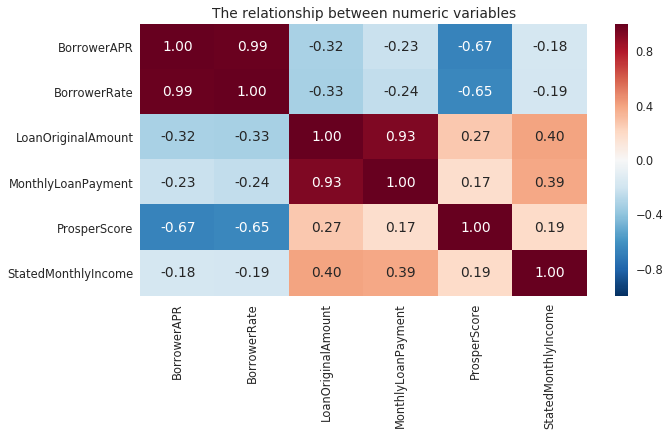

In [54]:
# Plotting a heat map to show the correlation of each numerical variable.
sb.set(font_scale=1.15)
plt.figure(figsize=(10,5))

sb.heatmap(loan[numeric_vars].corr(), cmap='RdBu_r', annot=True, fmt='.2f', vmin=-1, vmax=1);
plt.title("The relationship between numeric variables");

* The Loan original amount has a strong positive relationship with the monthly loan payment
* The prosper score has a negative relationship with borrower APR and Rate
* The Loan original amount has a negative relationship with borrowerAPR and Rate
* Borrower APR is positively highly correlated with Borrower Rate.

### The  correlation between LoanStatus and BorrowerRate

How does the loan status affect the borrowers rate?

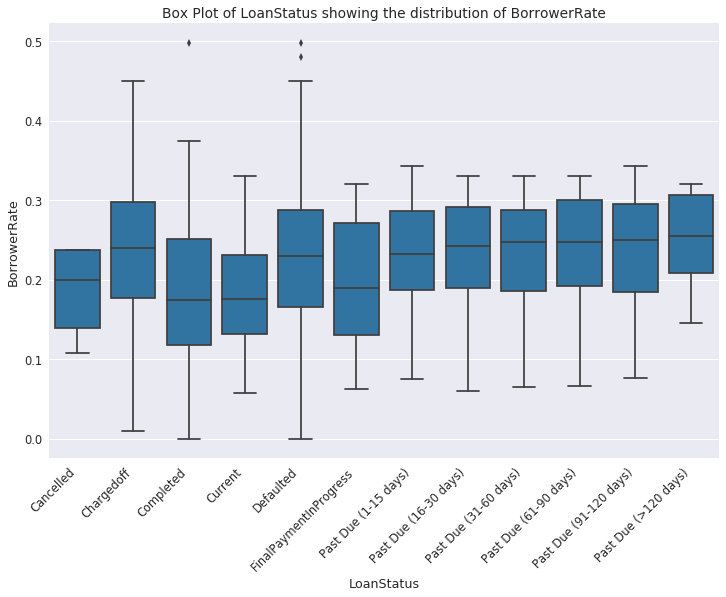

In [55]:
# plotting boxplot
plt.figure(figsize=(12,8))
sb.boxplot(x='LoanStatus', y='BorrowerRate', data=loan, color=color)
plt.xticks(rotation=45, ha='right');
plt.title("Box Plot of LoanStatus showing the distribution of BorrowerRate");

* There seems to be an increasing borrowers rate from the loan status "Past Due (1-15 days)" to "Past Due (>120 days)".This means the longers the loan is past due, the higher the interest rate prosper gets in return.
* Loan status- "Past Due (>120 days)" has the highest interest rate with a median of approx. 0.28 and "Past Due (91-120 days)" has second highest rate with a median of approx. 0.26.
* Loan status- "Completed" has the lowest interest rate with a median of approx. 0.18. 

### LoanOriginalAmount vs ProsperScore vs BorrowerRate

How does Borrower APR, Prosperscore and Loan original amount relate to one another?

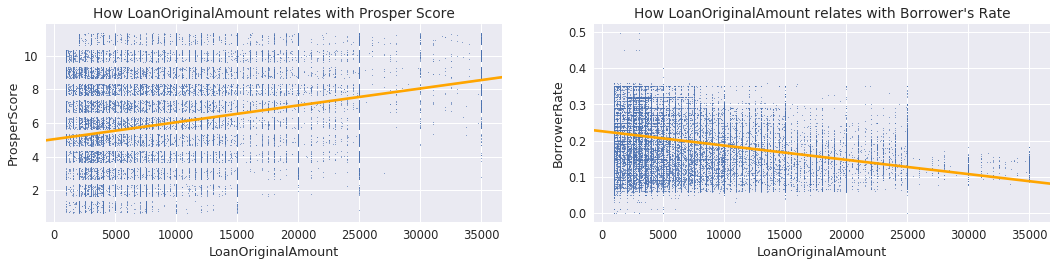

In [57]:
plt.figure(figsize = [18, 8])

plt.subplot(2, 2, 1)
sb.regplot(data = loan, x = 'LoanOriginalAmount', y = 'ProsperScore',
                y_jitter=0.35, scatter_kws={'s':1}, line_kws={'color':'orange'});
plt.title('How LoanOriginalAmount relates with Prosper Score')

plt.subplot(2, 2, 2)
sb.regplot(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerRate',
                scatter_kws={'s':1}, line_kws={'color':'orange'});
plt.title('How LoanOriginalAmount relates with Borrower\'s Rate');

* From the first figure, It shows that Loan original amount increases with an increase in Prosper score, which means there's a positive relationship.This also means that borrowers of large amount of loan tends to be at lower risk with prosper.
* The second plot shows that at different size of the loan amount, the APR has a large range, but the range of APR decreases with an increase in loan amount. Overall, the borrower APR is negatively correlated with loan amount.
* This generally indicate that people who borrows large amount of loan have lower interest rates and also have a lower risk(high score) with prosper.

### Relationships Between Four Categorical Features

Let's look at relationships between three categorical features.

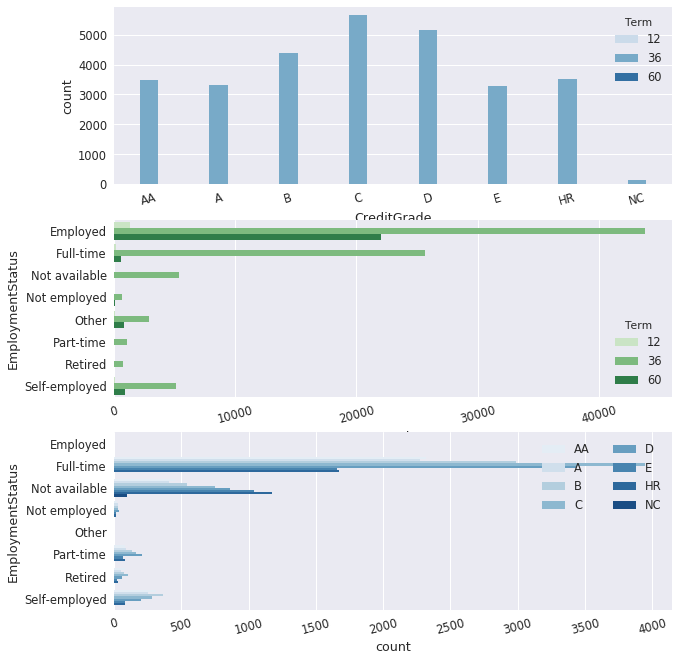

In [58]:
plt.figure(figsize = [10, 15])

# subplot 1:CreditGrade vs term
plt.subplot(4, 1, 1)
sb.countplot(data = loan, x = 'CreditGrade', hue = 'Term', palette = 'Blues')
plt.xticks(rotation = 15)

# subplot 2: employment status vs. term
ax = plt.subplot(4, 1, 2)
sb.countplot(data = loan, y = 'EmploymentStatus', hue = 'Term', palette = 'Greens')
plt.xticks(rotation = 15)

# subplot 3: CreditGrade vs. employment status, use different color palette
ax = plt.subplot(4, 1, 3)
sb.countplot(data = loan, y = 'EmploymentStatus', hue = 'CreditGrade', palette = 'Blues')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation = 15);

* The employment status variable do not have enough data on part-time, retired and not employed borrowers to show its interaction with term variables. But there is more 36 months on both Employed and Full-time workers.
* Also we can see that there is an interaction between term and CreditGrade and there are only 36 month loans populating on all CreditGrades from AA to NC borrowers.But the C borrowers has the highest 36 months loan.
* There is also an interaction between employment status and CreditGrade. Full-time workers has more of B, C, D, E and HR borrowers, But the C borrowers are the highest on Full-time workers.

Now let's see the relation between occupation and term

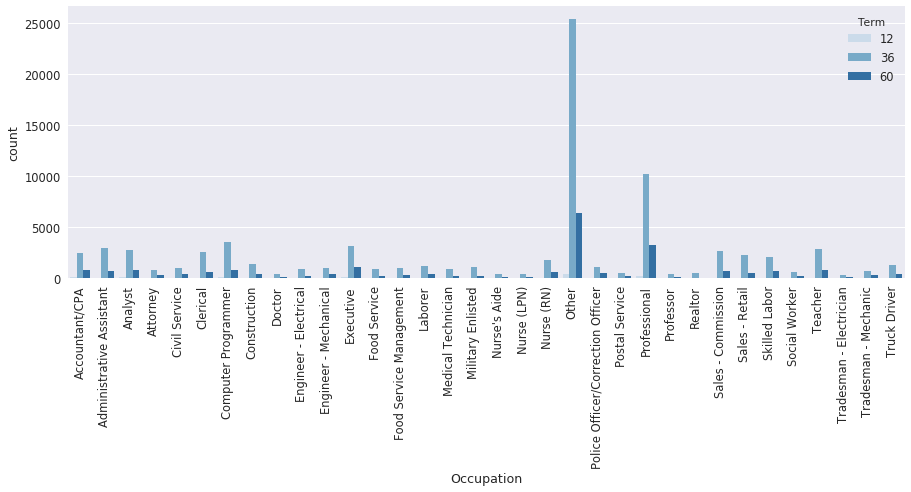

In [59]:
# plot of Occupation vs term
plt.figure(figsize = [15,5])
sb.countplot(data = new_loan, x = 'Occupation', hue = 'Term', order = order_occup, palette = 'Blues');
plt.xticks(rotation=90);

* Ignoring Other, Professionals have the highest count of 36 months. But generally all occupations prefer to take a loan for a duration of 36 months.

### The relationship between Listing Category and Loan Original Amount

Which listing category has the highest loan amount?

Text(0,0.5,'Listing Category')

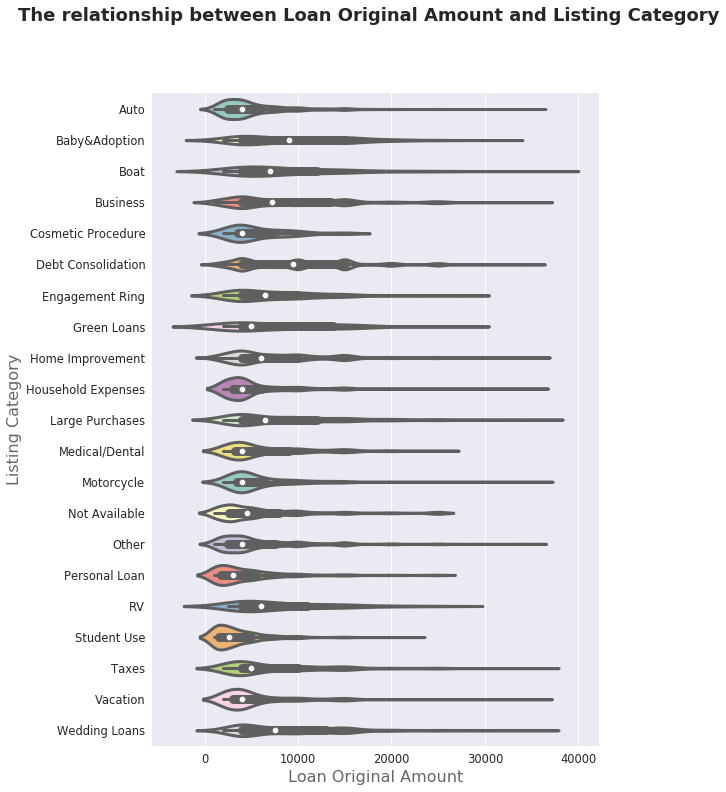

In [60]:
# Plotting a violin plot
f, ax = plt.subplots(figsize=(8,12))

# Show each distribution with both violins and points
sb.violinplot(x="LoanOriginalAmount",y="ListingCategory (numeric)",data=loan, 
              color=color, inner="box", palette="Set3", cut=2, linewidth=3)
sb.despine(left=True)

# Titles and labels
f.suptitle('The relationship between Loan Original Amount and Listing Category', fontsize=18, fontweight='bold')
ax.set_xlabel("Loan Original Amount",size = 16,alpha=0.7)
ax.set_ylabel("Listing Category",size = 16,alpha=0.7)

* We noticed that the most common reason people borrows money is for (Debt consolidation) which has the highest median and (student use) has a lowest median, which the least reason people borrow money.

### The correlation between Loan Original Amount and Monthly Loan Payment

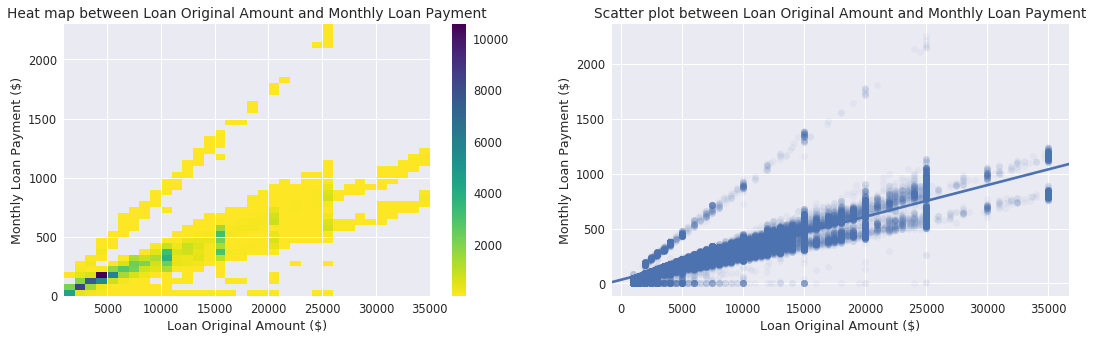

In [61]:
# Plotting Heatmap and Scatter plot between Loan Original Amount and Monthly Loan Payment
plt.figure(figsize = [18, 5])

plt.subplot(1, 2, 1)
x_bin = np.arange(loan['LoanOriginalAmount'].min(), loan['LoanOriginalAmount'].max()+1000,1000)
y_bin = np.arange(loan['MonthlyLoanPayment'].min(), loan['MonthlyLoanPayment'].max()+50, 50)
plt.hist2d(data = loan, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', bins = [x_bin, y_bin], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.xlabel("Loan Original Amount ($)");
plt.ylabel("Monthly Loan Payment ($)");
plt.title("Heat map between Loan Original Amount and Monthly Loan Payment");

plt.subplot(1, 2, 2)
sb.regplot(data=loan,x="LoanOriginalAmount",y="MonthlyLoanPayment",scatter_kws={"alpha":1/20});
plt.xlabel("Loan Original Amount ($)");
plt.ylabel("Monthly Loan Payment ($)");
plt.title("Scatter plot between Loan Original Amount and Monthly Loan Payment");

* The correlation between loan original amount and monthly loan payment is strongly positive in both heat map and scatter plot respectively.
* This means the loan original amount increases with an increase in monthly loan payment respectively.

### Numeric Variables Against Categorical Variables

 What is the relationship between numeric features and categorical features?

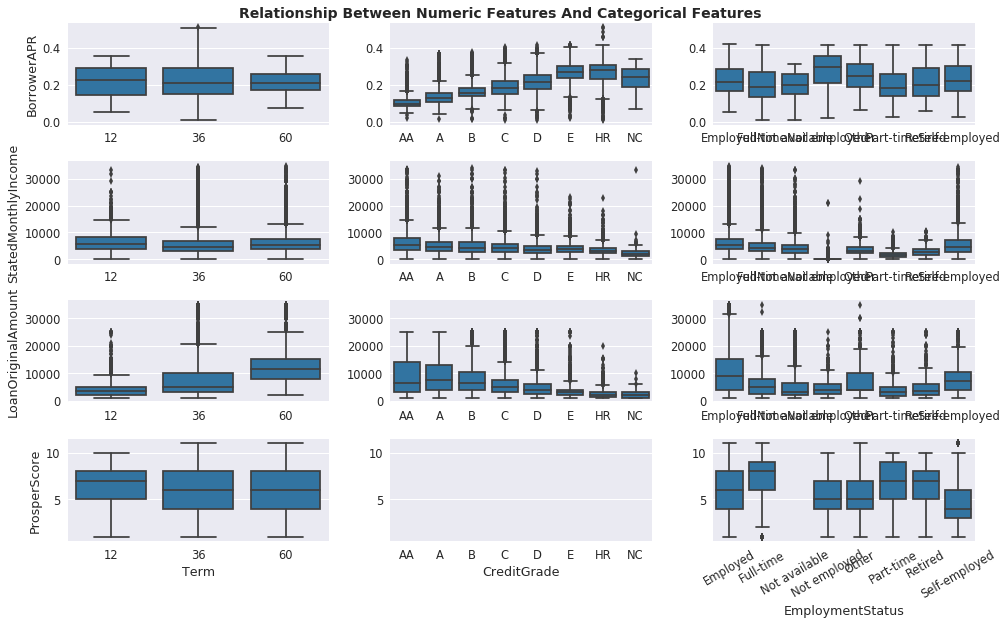

In [62]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sb.boxplot(x, y, color = color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'ProsperScore'], 
                x_vars = ['Term','CreditGrade', 'EmploymentStatus'], aspect = 1.5)

plt.suptitle("Relationship between Numeric Features and Categorical Features".title(), y = 1, 
              fontsize = 14, weight = "bold")

g.map(boxgrid);
# Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14, 8);
plt.xticks(rotation=30);

* The plot shows that the loan amount is increased with an increase in loan term. Loan amount of borrowers also tends to increase with a better CreditGrade.
* The borrower APR decreases with the better CreditGrade. Borrowers with the best CreditGrade have the lowest APR. It means that the CreditGrade has a strong effect on borrower APR. 
* Borrowers with better CreditGrade also have larger monthly income and loan amount. 
* Employed, self-employed and full time borrowers have higher monthly income and loan amount than part-time, retired and not employed borrowers.
* Borrowers with better high scores(i.e with low risk) have a shorter term of 12 months. Full-time and part-time workers have a higher prosper score. 

### ProsperScore vs. Borrower rates 

What effect does the interest rate have on prosper score?

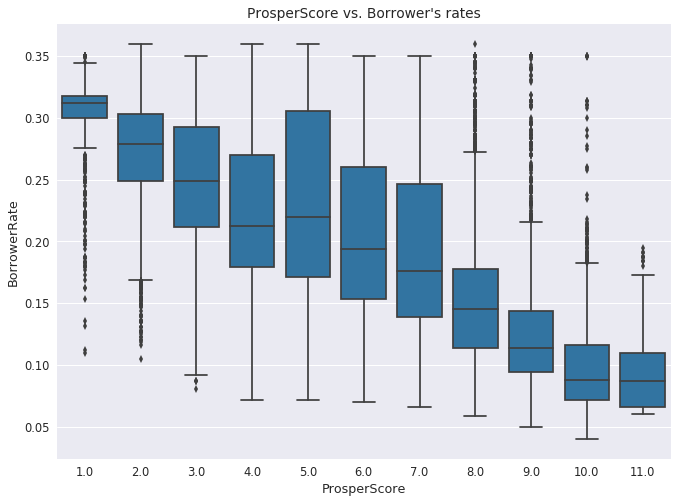

In [63]:
# Plotting a boxplot
plt.figure(figsize=[11, 8]);
sb.boxplot(data = loan, x = 'ProsperScore', y = 'BorrowerRate', color = color);
plt.title('ProsperScore vs. Borrower\'s rates');

* This plot shows a strong indication that prosper score is a good determining factor of borrower's rate. We can see that the lower the interest rate, the higher the score. and vis-a-vis
* This can also indicate that borrowers with lower interest rate have a lower risk with prosper score. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From all the above plots, that is the boxplot, violinplot and scatterplot, I have gathered some points which i have discussed below:
* The Loan original amount has a strong positive relationship with the monthly loan payment
* There seems to be an increasing borrowers rate from the loan status "Past Due (1-15 days)" to "Past Due (>120 days)".This means the longers the loan is past due, the higher the interest rate prosper gets in return.
* The range of APR decrease with an increase in loan amount. But overall, borrower APR is negatively correlated with loan amount.
* Loan amount is on an increase with an increase in loan term. Loan amount of borrowers also tends to increase with a better CreditGrade.
* The borrower APR decreases with the better CreditGrade. Borrowers with the best CreditGrade have the lowest APR. It means that the CreditGrade has a strong effect on borrower APR.
* At different size of the loan amount, the APR has a large range, but the range of APR decreases with an increase in loan amount. Overall, the borrower APR is negatively correlated with loan amount.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
* We noticed that the most common reason people borrows money is for (Debt consolidation) which has the highest median and (student use) has a lowest median, which the least reason people borrow money.
* Borrowers with better CreditGrade also have larger monthly income and loan amount
* From the first figure, It shows that Loan original amount increases with an increase in Prosper score, which means there's a positive relationship.This also means that borrowers of large amount of loan tends to be at lower risk with prosper.
* This generally indicate that people who borrows large amount of loan have lower interest rates and also have a lower risk(high score) with prosper.
* The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money.
* There is an interaction between term and CreditGrade and there are only 36 month loans populating on all CreditGrades from AA to NC borrowers.But the C borrowers has the highest 36 months loan.
* There is a strong indication that prosper score is a good determining factor of borrower's rate, because the lower the interest rate, the higher the score. and vis-a-vis.This can also indicate that borrowers with lower interest rate have a lower risk with prosper score(high score). 
* Borrowers with better high scores(i.e with low risk) have a shorter term of 12 months. Full-time and part-time workers have a higher prosper score. 


## Multivariate Exploration
The main thing I want to explore in this part of the analysis is how the categorical variable (CreditGrade, EmploymentStatus and term) play into the relationship between loan original amount and borrower APR.

### Effect of CreditGrade on the relationship of APR and loan amount

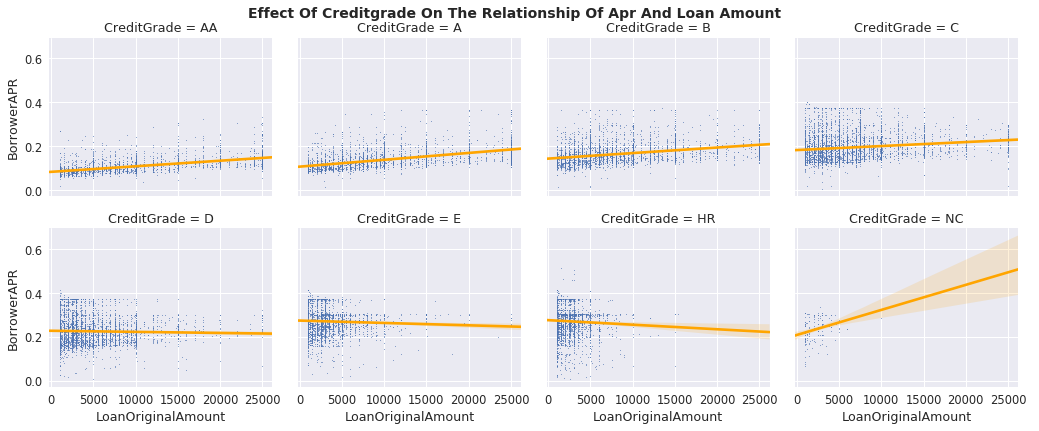

In [64]:
# CreditGrade effect on the relationship of APR and loan amount
g=sb.FacetGrid(data=loan, aspect=1.2, col='CreditGrade', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws={'s':1}, line_kws={'color':'orange'});

# Adding main title
plt.suptitle("Effect of CreditGrade on the relationship of APR and loan amount".title(), 
              y = 1, fontsize = 14, weight = "bold")
g.add_legend();

* The loan amount increases with better Credit Grades. The borrower APR decreases with better Grades. 
* People who borrowed a large loan amount tend to have a lower borrower APR, compared to people who borrows less amount.
* Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Credit Grades are increased from HR to AA or better. This may because people with A or AA Grades tend to borrow more money.
* Increasing APR could prevent them from borrowing even more and maximize the profit. And decreasing APR for people with lower Grades who borrows less money, could encourage them to borrow more.


### Borrower APR Across Employment Status and Term

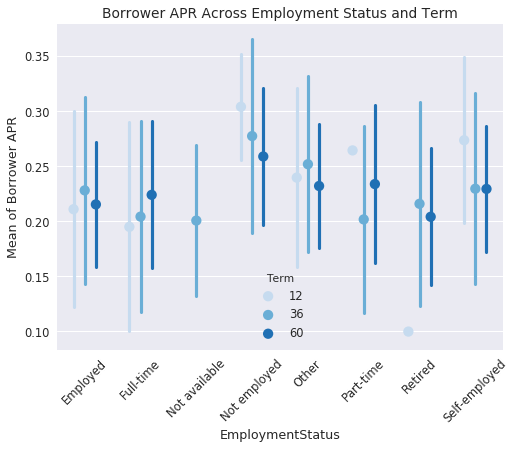

In [65]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR Across Employment Status and Term')
plt.xticks(rotation = 45);
plt.ylabel('Mean of Borrower APR')
ax.set_yticklabels([],minor = True);

* The figure shows that, the borrower APR decreases with an increase in borrowers term from Not-employed to Retired status. 
* But for people who are full-time workers, the APR increases with an increase in borrowers term.

### Loan Status vs. Borrower APR vs. Employment Status

How does Employment status affects loanstatus and borrowerAPR?

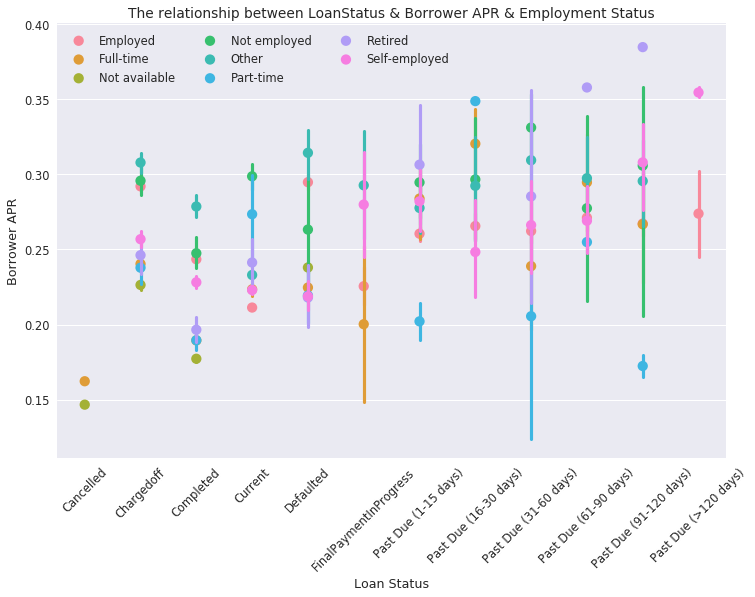

In [66]:
# Plotting a pointplot
plt.figure(figsize=[12,8])
sb.pointplot(data=loan,x="LoanStatus",y="BorrowerAPR",hue="EmploymentStatus",linestyles="");
plt.xticks(rotation =45);
plt.legend(ncol=3);

# labels and title
plt.ylabel("Borrower APR")
plt.xlabel("Loan Status");
plt.title("The relationship between LoanStatus & Borrower APR & Employment Status");

>From the graph we can notice that when the loan status is past due(91-120 days) the retired employees had the highest borrower APR. People with full time and part time jobs had a lower borrower APR in all loan status

### Listing Category vs. Loan Original Amount vs. Term

What is the relatioship between term, loanoriginalamount and listing category?

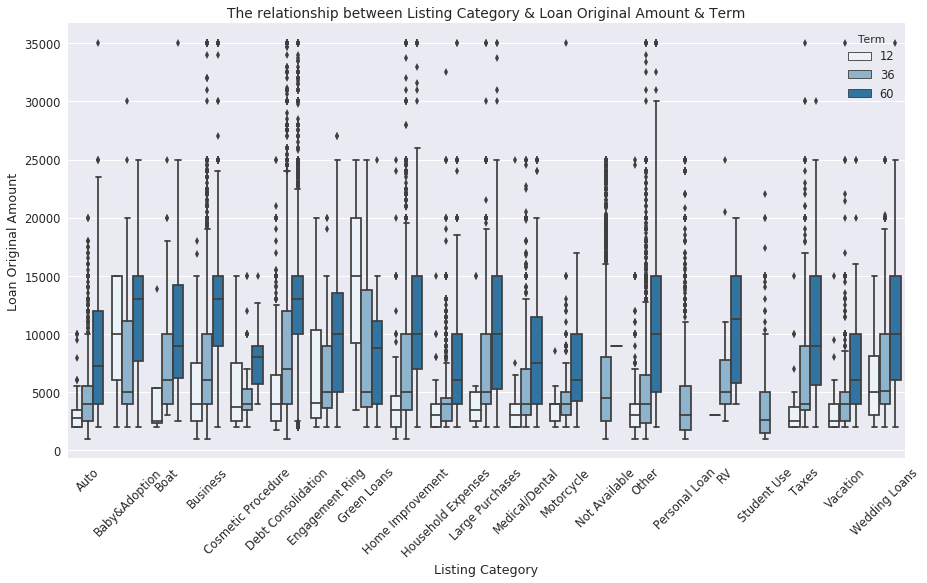

In [67]:
# Plotting a boxplot
plt.figure(figsize=[15,8])
sb.boxplot(data=loan,x="ListingCategory (numeric)",y="LoanOriginalAmount",hue="Term",color=color);
plt.xlabel("Listing Category");
plt.ylabel("Loan Original Amount");
plt.title("The relationship between Listing Category & Loan Original Amount & Term");
plt.xticks(rotation =45);

* The plot shows that the median of 12 months term for green loans category has the highest loan amount compared to the other two terms.
* But 60 months seems to have the highest median of loan amount in almost all the categories, while 12 months has the lowest median of loan amount in approximately all categories.
* Personal loan, student use, and Not Available categories takes loan for 36 months terms only and the amount seems to be low.
* This means that generally, all the categories who borrowed a larger amount of loan preferred 60 months term.

### Borrower APR vs. Borrower Rate vs. ProsperScore

What effect does prosper score have on Borrower APR and Borrower's Rate?

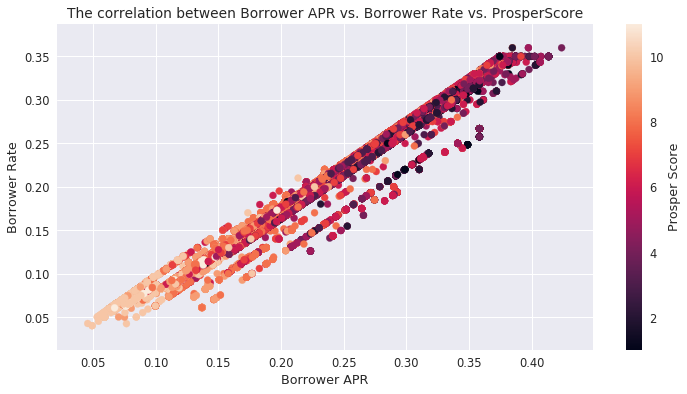

In [68]:
# Plotting a scatterplot
plt.figure(figsize=[12,6])
plt.scatter(data=loan,x="BorrowerAPR",y = "BorrowerRate",c="ProsperScore")
plt.xlabel("Borrower APR")
plt.ylabel("Borrower Rate");
plt.title("The correlation between Borrower APR vs. Borrower Rate vs. ProsperScore");
plt.colorbar(label="Prosper Score");

* From the plot, it shows that the loans with lower Borrower APR and Borrower Rate had a higher prosper score.While the loans with higher Borrower APR and Borrower Rate had a lower prosper score.
* This means that loans with higher Borrower APR and Borrower Rate have the highest risk according to the prosper score. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
* The loan amount increases with better Credit Grades. The borrower APR decreases with better Grades. 
* People who borrowed a large loan amount tend to have a lower borrower APR, compared to people who borrows less amount.
* This means Increasing APR could prevent them from borrowing even more and maximize the profit. And decreasing APR for people with lower Grades who borrows less money, could encourage them to borrow more.
* The borrower APR decreases with an increase in borrowers term from Not-employed to Retired status. 
* But for people who are full-time workers, the APR increases with an increase in borrowers term.

### Were there any interesting or surprising interactions between features?
* Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Credit Grades are increased from HR to AA or better. This may because people with A or AA Grades tend to borrow more money.
* The plot shows that the median of 12 months term for green loans category has the highest loan amount compared to the other two terms.
* But 60 months seems to have the highest median of loan amount in almost all the categories, while 12 months has the lowest median of loan amount in approximately all categories.
* Personal loan, student use, and Not Available categories takes loan for 36 months terms only and the amount seems to be low.
* This means that generally, all the categories who borrowed a larger amount of loan preferred 60 months term.
* People with full time and part time jobs had a lower borrower APR in all loan status

## Conclusions

### What affects the borrower’sAPR or interest rate?
* People who borrowed a large loan amount tend to have a lower borrower APR, compared to people who borrows less amount.
* The borrower APR decreases with the better CreditGrade. Borrowers with the best CreditGrade have the lowest APR. It means that the CreditGrade has a strong effect on borrower APR. 
* The range of APR decrease with an increase in loan amount. But overall, borrower APR is negatively correlated with loan amount.

### What factors affect a loan’s outcome status?
* There seems to be an increasing borrowers rate from the loan status "Past Due (1-15 days)" to "Past Due (>120 days)".This means the longers the loan is past due, the higher the interest rate prosper gets in return.
* Loan status- "Past Due (>120 days)" has the highest interest rate with a median of approx. 0.28 and "Past Due (91-120 days)" has second highest rate with a median of approx. 0.26.
* Loan status- "Completed" has the lowest interest rate with a median of approx. 0.18.
* People with full time and part time jobs had a lower borrower APR in all loan status

### The effect of the employment status and occupation and monthly salary to the original loan amount?
* I discovered that occupation do have an effect on  loan original amount. Doctor seems to have the highest median, followed by Attorney,Executive and Nurse (RN). It also does make sense since these 3 are usually higher paying jobs.
* Employed, self-employed and full time borrowers have higher monthly income and loan amount than part-time, retired and not employed borrowers.
* The correlation between loan original amount and monthly loan payment is strongly positive in both heat map and scatter plot respectively.This means the loan original amount increases with an increase in monthly loan payment respectively.

#### Now let's save our cleaned dataset for explanatory data analysis

In [69]:
# save the cleaned dataset
loan.to_csv('Cleaned_LoanData.csv')